c:\Users\phamp\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/2000
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0505 - val_loss: 0.0023
Epoch 2/2000
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0065 - val_loss: 0.0028
Epoch 3/2000
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0051 - val_loss: 0.0044
Epoch 4/2000
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0043 - val_loss: 0.0070
Epoch 5/2000
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0041 - val_loss: 0.0037
Epoch 6/2000
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0039 - val_loss: 0.0018
Epoch 7/2000
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0036 - val_loss: 0.0052
Epoch 8/2000
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0035 - val_loss: 0.0026
Epoch 9/2000
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0038 - val_loss: 0.0032
Epoch 10/2000
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0030 - val_loss: 0.0023
Epoch 11/2000
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0029 - val_loss: 0.0026
Epoch 12/2000
35/35 ━━━━━━━━━━━━━━━━━━━━ 

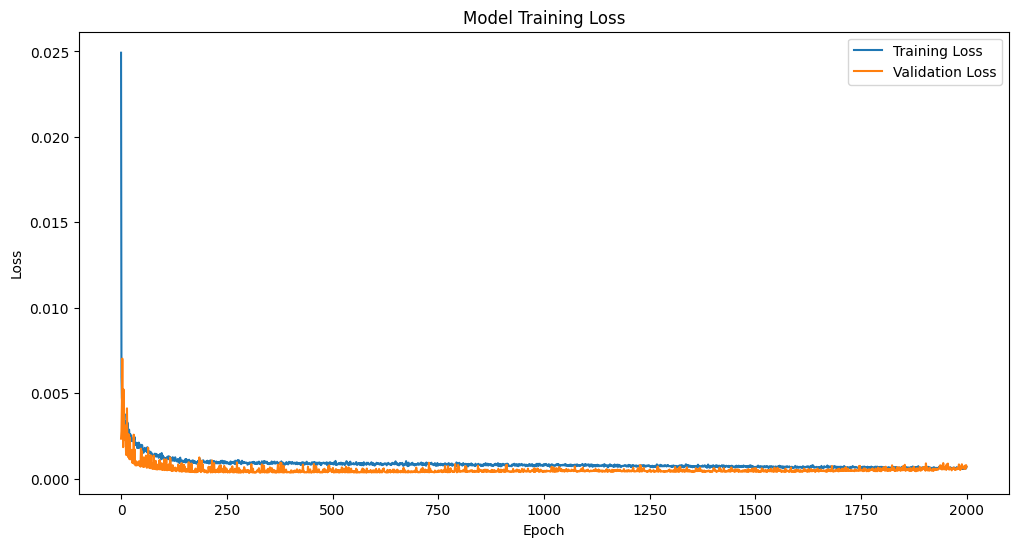

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━

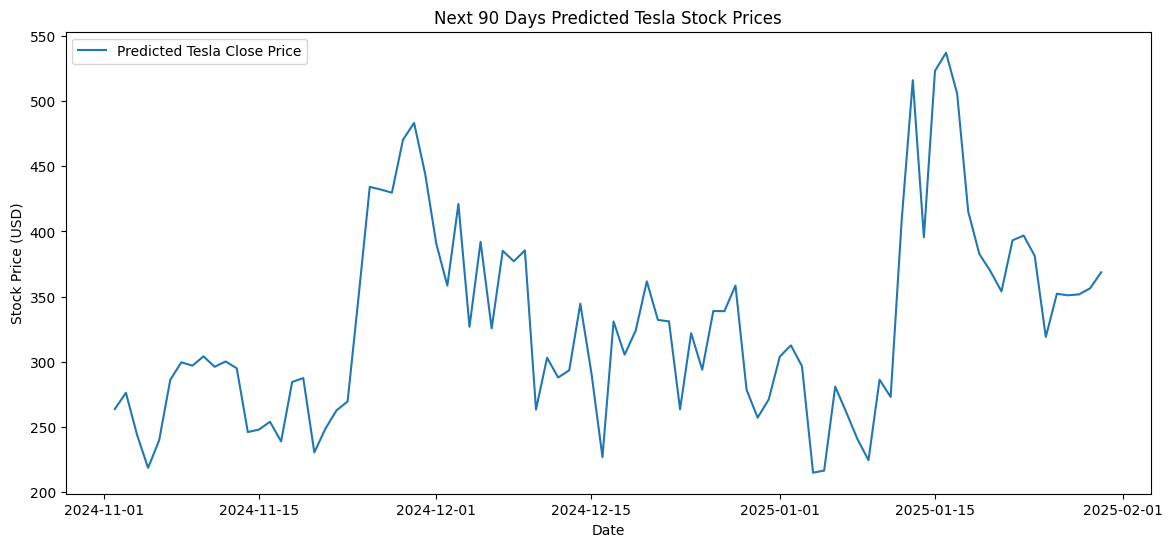

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

# Load and prepare the data
tesla_close = pd.read_csv('Tesla_Close_2019_2024.csv', parse_dates=['Date'], index_col='Date')
daily_revenue = pd.read_csv('Daily_Revenue_2019_2024.csv', parse_dates=['Date'], index_col='Date')
sp500 = pd.read_csv('S&P500_Close_2019_2024.csv', parse_dates=['Date'], index_col='Date')

# Merge the datasets on 'Date'
merged_data = tesla_close.merge(daily_revenue, left_index=True, right_index=True, how='inner', suffixes=('', '_revenue'))
merged_data = merged_data.merge(sp500, left_index=True, right_index=True, how='inner', suffixes=('', '_sp500'))

# Filter the data
merged_data = merged_data.loc['2019-01-01':'2024-11-01']

# Select relevant columns
data = merged_data[['Close', 'Daily Revenue', 'Close_sp500']]

# Scale the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Create the dataset function
def create_dataset(dataset, time_step=1):
    X, y = [], []
    for i in range(len(dataset) - time_step - 1):
        X.append(dataset[i:(i + time_step), :])  # All features as input
        y.append(dataset[i + time_step, 0])      # Only the 'Close' price as the target
    return np.array(X), np.array(y)

time_step = 60  # Using past 60 days
X, y = create_dataset(scaled_data, time_step)

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))  # Output layer to predict the 'Close' price

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=2000, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Predict the next 90 days
last_60_days = scaled_data[-60:]  # Last 60 days of data as input for prediction
input_seq = last_60_days.reshape(1, last_60_days.shape[0], last_60_days.shape[1])

predictions = []

for _ in range(90):
    pred = model.predict(input_seq)
    predictions.append(pred[0, 0])  # Add prediction to list

    # Update input_seq to include the new prediction
    pred_with_features = np.array([[pred[0, 0], 0, 0]])  # Prediction with dummy values for other features
    input_seq = np.concatenate((input_seq[:, 1:, :], pred_with_features.reshape(1, 1, 3)), axis=1)

# Transform predictions back to original scale
predictions = np.array(predictions).reshape(-1, 1)
predictions = scaler.inverse_transform(np.concatenate([predictions, np.zeros((90, 2))], axis=1))[:, 0]

# Plot the predictions
plt.figure(figsize=(14, 6))
plt.plot(pd.date_range(start='2024-11-02', periods=90), predictions, label='Predicted Tesla Close Price')
plt.title('Next 90 Days Predicted Tesla Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.show()
